In [1]:
import cv2
import numpy as np
import operator
import warnings
import sys
from matplotlib import pyplot as plt

from utils import *
from fatching import *
from values import *
from minutiae import *
from roc import *
from collections import defaultdict

from sklearn.metrics import accuracy_score, precision_score, f1_score
from pyeer.eer_info import get_eer_stats
from pyeer.report import generate_eer_report, export_error_rates
from pyeer.plot import plot_eer_stats

In [31]:
img = sys.argv[1]

file_names = os.listdir(r'/Users/bhavi/Desktop/preprop/Database/Final_JPEG/Camera/')
file_names.sort()
file_names = file_names[:40]
file_names

# img1 = cv2.imread("dbc/c1_1.bmp" , cv2.IMREAD_GRAYSCALE)
# sc1 = cv2.imread("Database/Final_BMP/Scanner/s1_1.bmp" , cv2.IMREAD_GRAYSCALE)
# plt.imshow(img1,cmap = 'gray')

['c100_1.jpg',
 'c100_2.jpg',
 'c100_3.jpg',
 'c100_4.jpg',
 'c101_1.jpg',
 'c101_2.jpg',
 'c101_3.jpg',
 'c101_4.jpg',
 'c102_1.jpg',
 'c102_2.jpg',
 'c102_3.jpg',
 'c102_4.jpg',
 'c103_1.jpg',
 'c103_2.jpg',
 'c103_3.jpg',
 'c103_4.jpg',
 'c104_1.jpg',
 'c104_2.jpg',
 'c104_3.jpg',
 'c104_4.jpg',
 'c105_1.jpg',
 'c105_2.jpg',
 'c105_3.jpg',
 'c105_4.jpg',
 'c106_1.jpg',
 'c106_2.jpg',
 'c106_3.jpg',
 'c106_4.jpg',
 'c107_1.jpg',
 'c107_2.jpg',
 'c107_3.jpg',
 'c107_4.jpg',
 'c108_1.jpg',
 'c108_2.jpg',
 'c108_3.jpg',
 'c108_4.jpg',
 'c109_1.jpg',
 'c109_2.jpg',
 'c109_3.jpg',
 'c109_4.jpg']

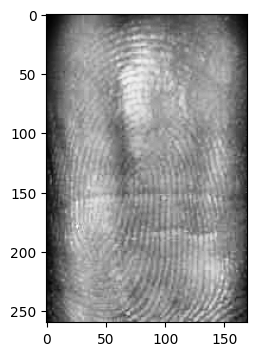

In [11]:
img1 = cv2.imread("/Users/bhavi/Desktop/preprop/dbc/c1_1.bmp" , cv2.IMREAD_GRAYSCALE)
clahe = cv2.createCLAHE(clipLimit =5, tileGridSize=(4,4))
cl_img = clahe.apply(img1)
#ret, thresh3 = cv2.threshold(cl_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ATG_image = cv2.adaptiveThreshold(cl_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,29,10) 
plt.figure(figsize = (4,4))
#plt.imshow(ATG_image,cmap = 'gray')

plt.imshow(cl_img,cmap = 'gray')

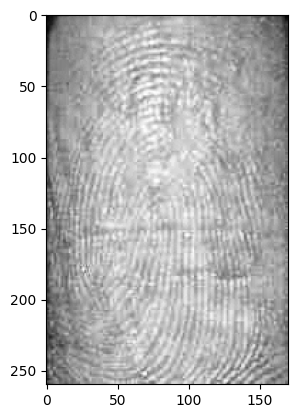

In [12]:
image_gray = cv2.imread("/Users/bhavi/Desktop/preprop/dbc/c1_1.bmp" , cv2.IMREAD_GRAYSCALE)
image_gray = (image_gray-np.min(image_gray[:]))/np.ptp(image_gray[:])

clahe_gs = 29; cl_clip_lim = 5;
clahe = cv2.createCLAHE(clipLimit=cl_clip_lim, tileGridSize=(clahe_gs,clahe_gs))
image_clahe = clahe.apply((255*image_gray).astype('uint8')).astype('float'); 
image_clahe = (image_clahe-np.min(image_clahe))/np.ptp(image_clahe[:]);
plt.imshow(image_clahe,cmap = 'gray')

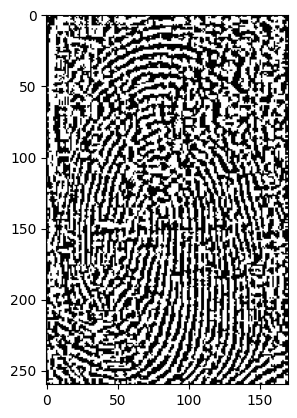

In [25]:
ATG_image = cv2.adaptiveThreshold(((255*image_clahe).astype('uint8')),255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,13,0.5)
plt.imshow(ATG_image,cmap = 'gray')

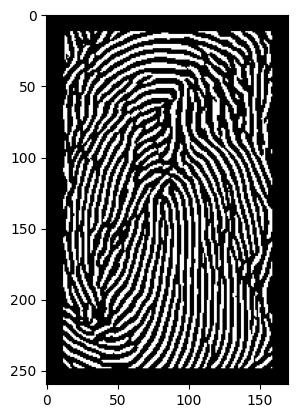

In [26]:
import fingerprint_enhancer	
gray_img = grayscale_image(ATG_image)
img3 = fingerprint_enhancer.enhance_Fingerprint(gray_img)
plt.imshow(img3,cmap = 'gray')

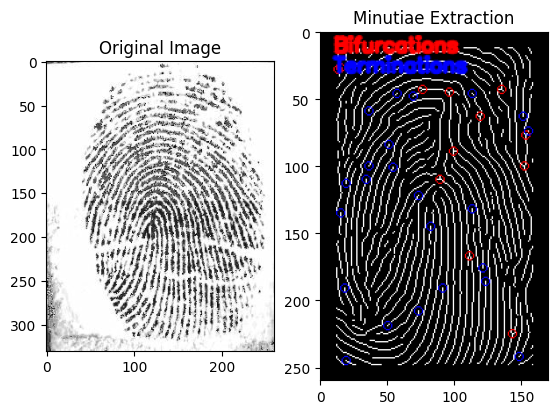

In [8]:
#-----------------------calling minutiae and display result-----------------------------------------
FeaturesTerminations, FeaturesBifurcations,DispImg = extract_minutiae_features(img3, showResult=True)
font = cv2.FONT_HERSHEY_SIMPLEX
color = (255, 0, 0)
org = (10, 15)
DispImg = cv2.putText(DispImg, 'Bifurcations', org, font,0.5, color,2, cv2.LINE_AA)
color1 = (0, 0, 255)
org1 = (10, 30)
DispImg = cv2.putText(DispImg, 'Terminations', org1, font,0.5, color1,2, cv2.LINE_AA)
plt.figure(figsize = (10,10))
plt.subplot(1,3,1), plt.imshow(sc1,cmap = 'gray')
plt.title('Original Image')
plt.subplot(1,3,2), plt.imshow(DispImg,cmap = 'gray')
plt.title('Minutiae Extraction')
plt.show()

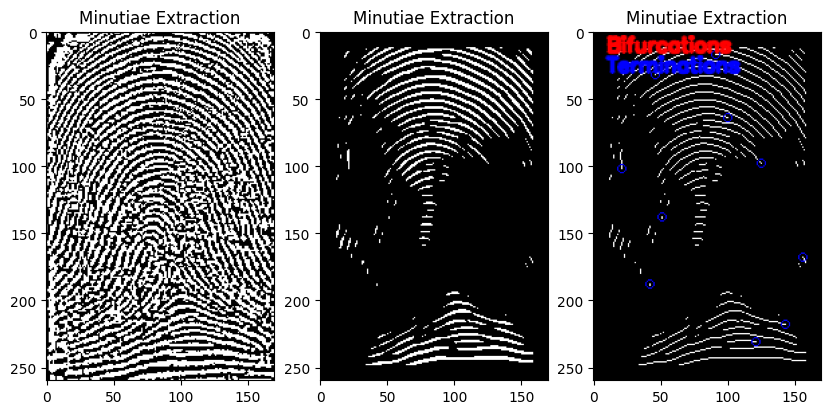

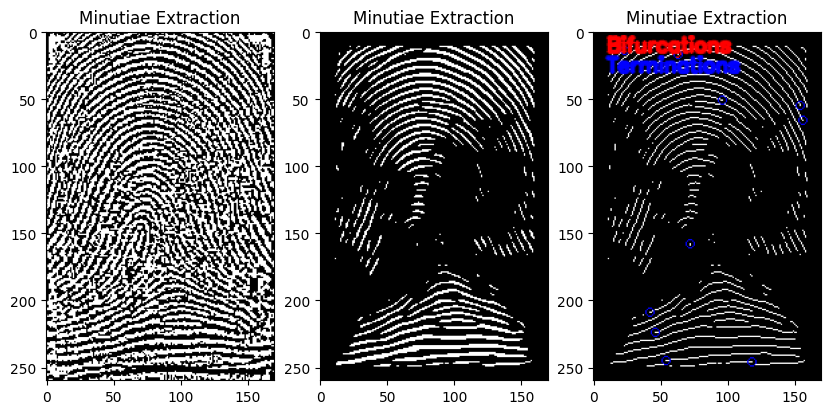

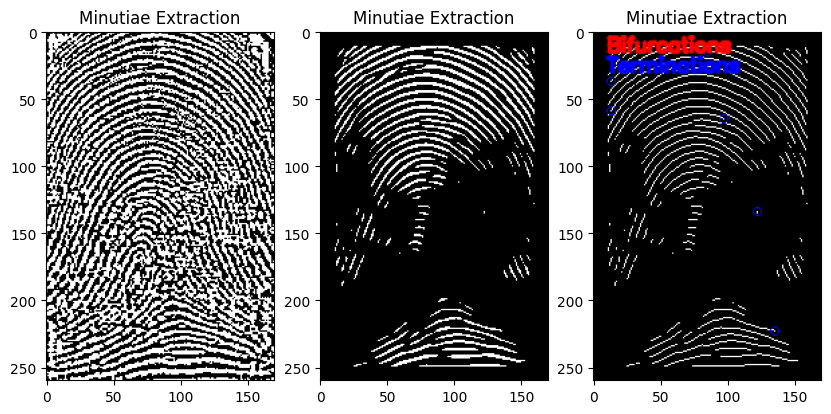

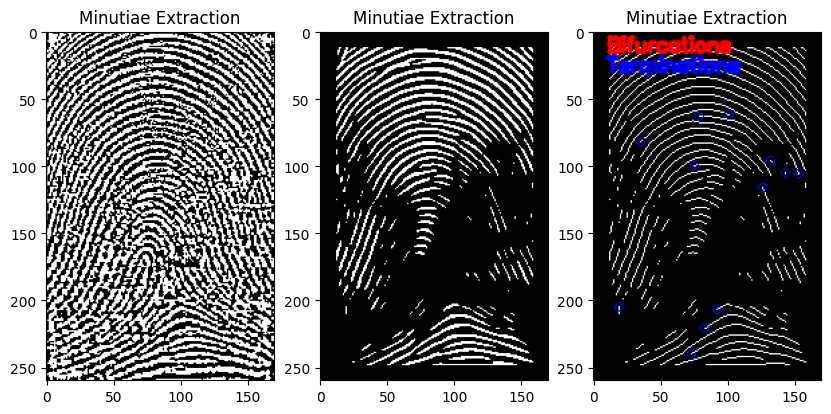

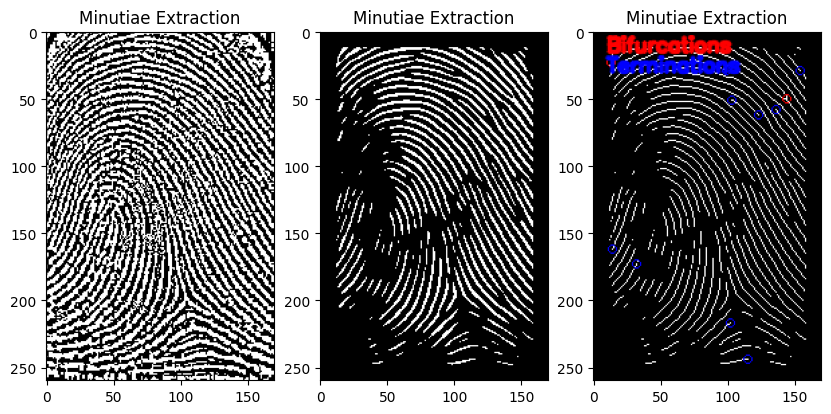

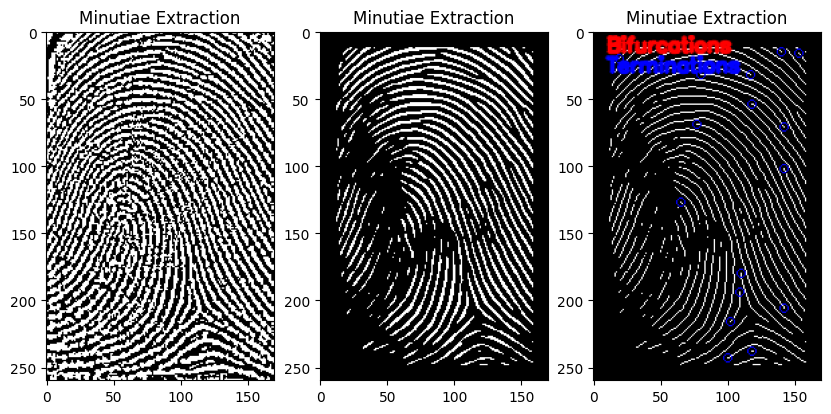

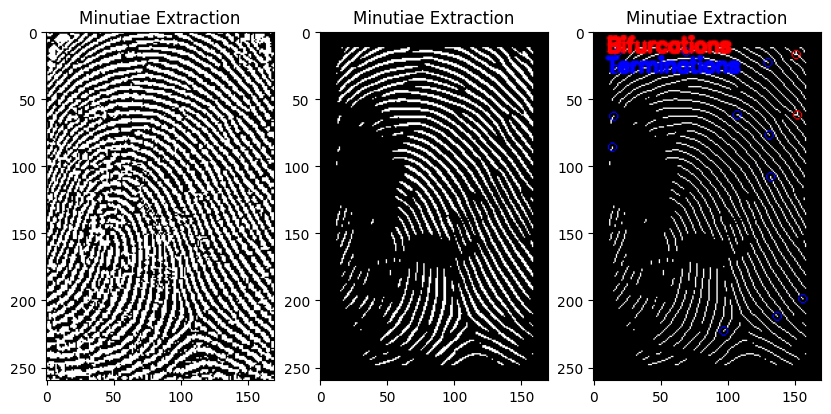

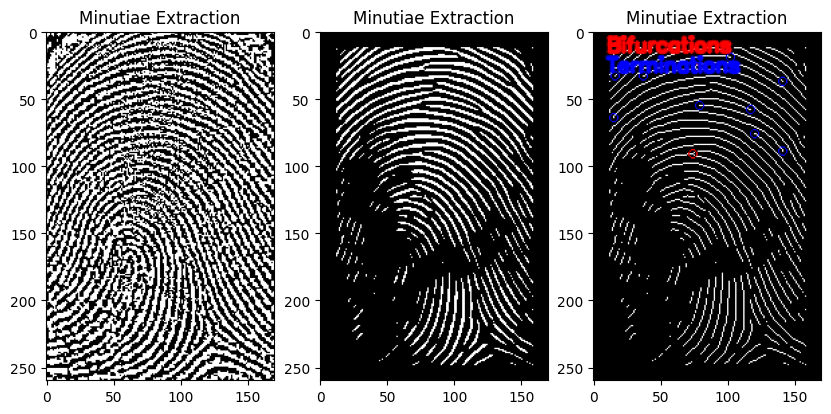

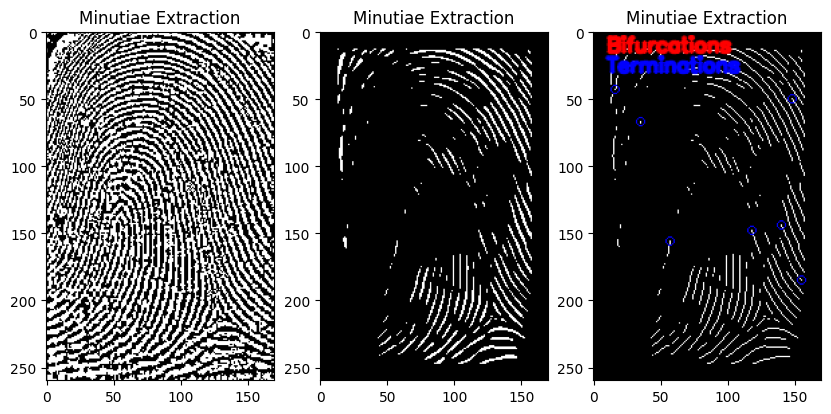

KeyboardInterrupt: 

In [43]:
img = sys.argv[1]

file_names = os.listdir(r'/Users/bhavi/Desktop/preprop/Database/Final_JPEG/Camera/')
file_names.sort()
file_names = file_names[:40]

for file_name in file_names:
    image_gray = cv2.imread("/Users/bhavi/Desktop/preprop/Database/Final_JPEG/Camera/"+file_name  , cv2.IMREAD_GRAYSCALE)
    # print(image_gray.shape)

    image_gray = (image_gray-np.min(image_gray))/np.ptp(image_gray)
    clahe_gs = 29; cl_clip_lim = 5;
    clahe = cv2.createCLAHE(clipLimit=cl_clip_lim, tileGridSize=(clahe_gs,clahe_gs))
    image_clahe = clahe.apply((255*image_gray).astype('uint8')).astype('float'); 
    image_clahe = (image_clahe-np.min(image_clahe))/np.ptp(image_clahe[:]);

    ATG_image = cv2.adaptiveThreshold(((255*image_clahe).astype('uint8')),255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,13,0.5)
    # plt.imshow(ATG_image,cmap = 'gray')

    gray_img = grayscale_image(ATG_image)
    img_enhanced = fingerprint_enhancer.enhance_Fingerprint(image_gray)
    # plt.imshow(img_enhanced,cmap = 'gray')

    FeaturesTerminations, FeaturesBifurcations,DispImg = extract_minutiae_features(img_enhanced, showResult=True)
    font = cv2.FONT_HERSHEY_SIMPLEX
    color = (255, 0, 0)
    org = (10, 15)
    DispImg = cv2.putText(DispImg, 'Bifurcations', org, font,0.5, color,2, cv2.LINE_AA)
    color1 = (0, 0, 255)
    org1 = (10, 30)
    DispImg = cv2.putText(DispImg, 'Terminations', org1, font,0.5, color1,2, cv2.LINE_AA)
    plt.figure(figsize = (10,10))
    
    plt.subplot(1,3,1); plt.imshow(ATG_image,cmap = 'gray'); plt.title('Minutiae Extraction')
    plt.subplot(1,3,2); plt.imshow(img_enhanced,cmap = 'gray'); plt.title('Minutiae Extraction')
    plt.subplot(1,3,3); plt.imshow(DispImg,cmap = 'gray'); plt.title('Minutiae Extraction')
    plt.show()

    
    